## UAS Pengolahan Citra
Nama : M Mahfudl Awaludin <br>
Nim  : 210401010058

Analisis Perbandingan Operator Roberts dan Sobel
1. Operator Roberts
Kelebihan:
Menggunakan kernel kecil (2×2), sehingga lebih ringan secara komputasi.
Lebih cepat dibandingkan metode lain karena hanya menggunakan perbedaan nilai piksel terdekat.
Cocok untuk perangkat dengan keterbatasan komputasi.
Kekurangan:
Kurang efektif dalam menangkap detail tepi yang kompleks.
Sensitif terhadap noise karena hanya melihat perubahan antara dua piksel.
Kurang akurat dalam mendeteksi perubahan gradien pada area yang lebih besar.
2. Operator Sobel
Kelebihan:
Menggunakan kernel 3×3 yang lebih besar dibandingkan Roberts, sehingga lebih stabil terhadap noise.
Mampu menangkap perubahan gradien yang lebih luas dan menghasilkan deteksi tepi yang lebih halus.
Lebih baik dalam mendeteksi detail gambar yang kompleks.
Kekurangan:
Lebih mahal secara komputasi dibandingkan Roberts karena menggunakan kernel yang lebih besar.
Kurang efisien jika hanya membutuhkan deteksi tepi cepat pada gambar sederhana.


### Kode Soal 1

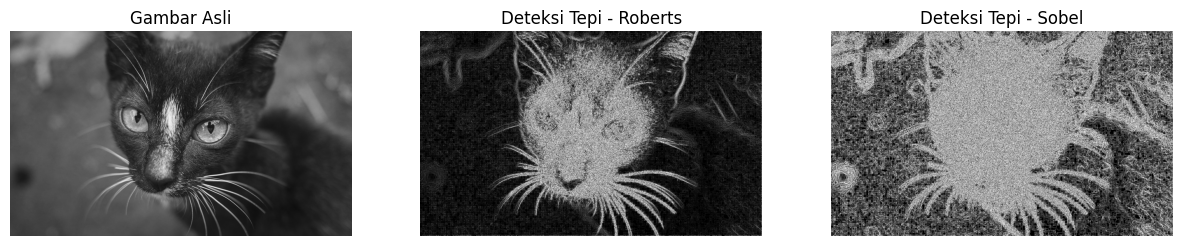

In [3]:
# Mengimport library yang digunakan
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Fungsi untuk deteksi tepi dengan Operator Roberts
def roberts_operator(image):
    roberts_x = np.array([[1, 0], [0, -1]])  # Kernel untuk sumbu X
    roberts_y = np.array([[0, 1], [-1, 0]])  # Kernel untuk sumbu Y

    edge_x = convolve(image, roberts_x, mode='constant', cval=0.0)
    edge_y = convolve(image, roberts_y, mode='constant', cval=0.0)

    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)  # Magnitudo Gradien
    return edge_magnitude

# Fungsi untuk deteksi tepi dengan Operator Sobel
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Kernel Sobel X
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Kernel Sobel Y

    edge_x = convolve(image, sobel_x, mode='constant', cval=0.0)
    edge_y = convolve(image, sobel_y, mode='constant', cval=0.0)

    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)  # Magnitudo Gradien
    return edge_magnitude

# Load gambar grayscale
image = imageio.imread('/content/sample.jpg', mode='L')

# Menerapkan operator Roberts dan Sobel
edges_roberts = roberts_operator(image)
edges_sobel = sobel_operator(image)

# Menampilkan hasil perbandingan
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis('off')

ax[1].imshow(edges_roberts, cmap='gray')
ax[1].set_title("Deteksi Tepi - Roberts")
ax[1].axis('off')

ax[2].imshow(edges_sobel, cmap='gray')
ax[2].set_title("Deteksi Tepi - Sobel")
ax[2].axis('off')

plt.show()


**Hasil & Analisa**

1. Gambar Asli (Kiri)
Gambar pertama menunjukkan gambar asli dalam skala grayscale. Ini adalah gambar seekor kucing dengan latar belakang yang agak blur. Objek utama yang memiliki detail tinggi adalah bagian mata, kumis, dan batas kepala kucing.

2. Hasil Deteksi Tepi dengan Operator Roberts (Tengah)
- Karakteristik:<br>
Gambar hasil deteksi tepi menggunakan Roberts Operator terlihat memiliki banyak titik bintik atau noise, terutama di area yang seharusnya memiliki perubahan intensitas kecil.
Deteksi tepi terlihat cukup tajam pada bagian yang memiliki perubahan kontras tinggi, seperti kumis kucing, mata, dan batas kepala.
Namun, hasilnya cenderung lebih kasar dan lebih terpengaruh oleh noise dibandingkan dengan metode Sobel.
- Interpretasi:<br>
Operator Roberts menggunakan kernel 2×2, sehingga deteksi tepinya bekerja dengan sangat lokal dan sensitif terhadap perubahan kecil.
Metode ini kurang mampu menangkap detail pada gambar yang memiliki gradasi halus, yang menyebabkan banyak noise muncul pada bagian wajah kucing.
Kurang optimal untuk gambar dengan detail kompleks, tetapi cukup baik untuk pendeteksian tepi cepat pada gambar sederhana.
3. Hasil Deteksi Tepi dengan Operator Sobel (Kanan)
- Karakteristik:<br>
Gambar hasil deteksi tepi menggunakan Sobel Operator terlihat memiliki deteksi yang lebih halus dibandingkan dengan Roberts.
Tepi yang terdeteksi lebih luas, terutama pada kumis, batas kepala, dan mata kucing.
Namun, tampak bahwa gambar masih cukup berisik dengan banyak noise di bagian yang tidak seharusnya terdeteksi sebagai tepi.
- Interpretasi:<br>
Operator Sobel menggunakan kernel 3×3, sehingga hasilnya lebih stabil dibandingkan Roberts dalam menangkap tepi.
Meskipun lebih akurat dalam menangkap tepi yang lebih besar, hasil deteksi masih mengandung noise dalam jumlah yang signifikan.
Sobel lebih baik dibandingkan Roberts dalam menangani detail kompleks, tetapi masih memerlukan filter tambahan untuk mengurangi noise.

**Perbandingan**<br>

| Kriteria                  | Roberts Operator         | Sobel Operator           |
|---------------------------|-------------------------|--------------------------|
| **Ketajaman Tepi**        | Cukup tajam, tetapi kasar | Lebih halus dan lebih jelas |
| **Sensitivitas terhadap Noise** | Sangat tinggi (banyak bintik) | Sedang, tetapi masih cukup tinggi |
| **Ketepatan Deteksi**     | Deteksi kurang stabil   | Lebih baik dalam menangkap detail |
| **Efisiensi Komputasi**   | Cepat (Kernel 2×2)      | Lebih lambat (Kernel 3×3) |
| **Cocok untuk Gambar**    | Gambar sederhana, high contrast | Gambar dengan detail lebih kompleks |




### Implementasi Segmentasi Citra dengan K-Means

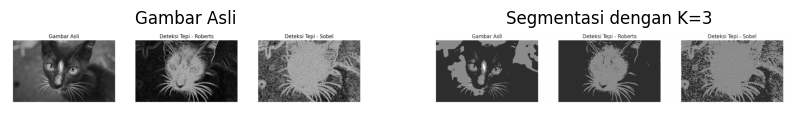

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image = cv2.imread('/content/hasil.png')  # Gantilah dengan path gambar Anda
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah ke RGB

# Ubah gambar menjadi array 2D (untuk clustering)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Konversi ke float untuk K-Means

# Tentukan jumlah cluster (K)
K = 3  # Bisa disesuaikan dengan kebutuhan
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Ubah nilai pusat cluster ke dalam bentuk integer
centers = np.uint8(centers)

# Rekonstruksi gambar dengan warna hasil clustering
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Menampilkan gambar asli dan hasil segmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmentasi dengan K={K}")
plt.axis("off")

plt.show()


### Analisis Hasil Segmentasi Citra dengan K-Means (K=3)

1. Deskripsi Gambar

- Gambar menunjukkan hasil segmentasi citra menggunakan K-Means Clustering dengan K=3.

- Terdapat dua bagian utama dalam gambar:

  - Bagian kiri: Gambar asli dalam skala abu-abu beserta hasil deteksi tepi menggunakan operator Roberts dan Sobel.

  - Bagian kanan: Hasil segmentasi citra setelah diterapkan K-Means Clustering (K=3) pada gambar asli dan hasil deteksi tepi.

2. Analisis Perbandingan Sebelum dan Sesudah Segmentasi

a. Gambar Asli vs. Hasil Segmentasi

- Pada gambar asli, terdapat berbagai tingkatan intensitas abu-abu yang menunjukkan variasi warna dan tekstur dalam citra.

- Setelah dilakukan segmentasi dengan K=3, gambar terbagi menjadi tiga kelompok intensitas berbeda, menghasilkan efek penyederhanaan warna (quantization).

- Piksel yang memiliki kemiripan dalam intensitas diklasifikasikan ke dalam 3 cluster, yang menghasilkan tampilan gambar dengan batas-batas objek yang lebih jelas.

b. Deteksi Tepi (Roberts & Sobel) Sebelum dan Sesudah Segmentasi

- Sebelum segmentasi:

  - Deteksi tepi dengan Roberts dan Sobel menyoroti fitur utama dalam gambar, seperti kontur bulu kucing dan detail lainnya.

  - Metode Roberts menghasilkan garis yang lebih tipis, sedangkan Sobel menghasilkan garis tepi yang lebih tebal dan lebih jelas.

- Setelah segmentasi dengan K-Means (K=3):

  - Tepi yang terdeteksi dari metode Roberts dan Sobel tetap terlihat tetapi menjadi lebih terklasifikasi ke dalam tiga kelompok warna.

  - Segmentasi ini membuat fitur tepi lebih terorganisir dan membantu dalam pemisahan objek dari latar belakang.

3. Interpretasi Hasil Segmentasi

- Keuntungan Segmentasi dengan K-Means (K=3):

  - Mengurangi kompleksitas gambar dengan hanya menggunakan 3 warna dominan, memudahkan analisis objek.

  - Membantu mengisolasi bagian utama gambar dari latar belakang.

  - Memperjelas fitur penting dalam gambar dengan mengelompokkan piksel yang mirip.

- Kekurangan Segmentasi dengan K=3:

  - Informasi tekstur dan detail halus hilang, karena K-Means hanya mempertimbangkan warna piksel tanpa mempertimbangkan hubungan spasial antar piksel.

  - Bagian latar belakang dan beberapa detail mungkin terkelompok ke dalam cluster yang sama, sehingga beberapa informasi dalam gambar dapat tersamarkan.